# Task
Build and evaluate a Decision Tree Classifier model to predict customer purchases using the 'bank+marketing.zip' dataset, specifically the 'bank-additional-full.csv' file, and summarize the findings.

## Unzip Dataset

### Subtask:
Unzip the provided 'bank+marketing.zip' file to access the dataset.


**Reasoning**:
To unzip the file, I need to import the `zipfile` module and use it to extract the specified CSV file from the archive.



In [ ]:
import zipfile

zip_file_path = '/content/bank+marketing.zip'
extract_file_name = 'bank-additional-full.csv'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # List all files in the zip archive to verify the file name
    print("Files in zip archive:", zip_ref.namelist())

    # Extract the specific file
    zip_ref.extract(extract_file_name, '/content/')

print(f"'{extract_file_name}' extracted successfully to '/content/'")

Files in zip archive: ['bank.zip', 'bank-additional.zip']


KeyError: "There is no item named 'bank-additional-full.csv' in the archive"

**Reasoning**:
The previous code failed because 'bank-additional-full.csv' was not found directly in 'bank+marketing.zip'. The stdout indicated that 'bank+marketing.zip' contains 'bank-additional.zip'. Therefore, I need to first extract 'bank-additional.zip' and then extract 'bank-additional-full.csv' from it.



In [ ]:
import zipfile
import os

zip_file_path = '/content/bank+marketing.zip'
intermediate_zip_name = 'bank-additional.zip'
final_extract_file_name = 'bank-additional-full.csv'

# Step 1: Extract the intermediate zip file from the main archive
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    print(f"Files in '{zip_file_path}': {zip_ref.namelist()}")
    zip_ref.extract(intermediate_zip_name, '/content/')
print(f"'{intermediate_zip_name}' extracted successfully to '/content/'")

# Step 2: Extract the target CSV from the intermediate zip file
intermediate_zip_path = os.path.join('/content/', intermediate_zip_name)
with zipfile.ZipFile(intermediate_zip_path, 'r') as intermediate_zip_ref:
    print(f"Files in '{intermediate_zip_name}': {intermediate_zip_ref.namelist()}")
    intermediate_zip_ref.extract(final_extract_file_name, '/content/')

print(f"'{final_extract_file_name}' extracted successfully to '/content/'")


Files in '/content/bank+marketing.zip': ['bank.zip', 'bank-additional.zip']
'bank-additional.zip' extracted successfully to '/content/'
Files in 'bank-additional.zip': ['bank-additional/', 'bank-additional/.DS_Store', '__MACOSX/', '__MACOSX/bank-additional/', '__MACOSX/bank-additional/._.DS_Store', 'bank-additional/.Rhistory', 'bank-additional/bank-additional-full.csv', 'bank-additional/bank-additional-names.txt', 'bank-additional/bank-additional.csv', '__MACOSX/._bank-additional']


KeyError: "There is no item named 'bank-additional-full.csv' in the archive"

**Reasoning**:
The previous attempt to extract 'bank-additional-full.csv' failed because the file is nested within a subdirectory 'bank-additional/' inside 'bank-additional.zip'. I need to correct the path for the file to be extracted from the intermediate zip archive.



In [ ]:
import zipfile
import os

zip_file_path = '/content/bank+marketing.zip'
intermediate_zip_name = 'bank-additional.zip'
final_extract_file_name_in_zip = 'bank-additional/bank-additional-full.csv' # Corrected path
output_dir = '/content/'

# Step 1: Extract the intermediate zip file from the main archive
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    print(f"Files in '{zip_file_path}': {zip_ref.namelist()}")
    zip_ref.extract(intermediate_zip_name, output_dir)
print(f"'{intermediate_zip_name}' extracted successfully to '{output_dir}'")

# Step 2: Extract the target CSV from the intermediate zip file
intermediate_zip_path = os.path.join(output_dir, intermediate_zip_name)
with zipfile.ZipFile(intermediate_zip_path, 'r') as intermediate_zip_ref:
    print(f"Files in '{intermediate_zip_name}': {intermediate_zip_ref.namelist()}")
    intermediate_zip_ref.extract(final_extract_file_name_in_zip, output_dir)

print(f"'{final_extract_file_name_in_zip}' extracted successfully to '{output_dir}'")


Files in '/content/bank+marketing.zip': ['bank.zip', 'bank-additional.zip']
'bank-additional.zip' extracted successfully to '/content/'
Files in 'bank-additional.zip': ['bank-additional/', 'bank-additional/.DS_Store', '__MACOSX/', '__MACOSX/bank-additional/', '__MACOSX/bank-additional/._.DS_Store', 'bank-additional/.Rhistory', 'bank-additional/bank-additional-full.csv', 'bank-additional/bank-additional-names.txt', 'bank-additional/bank-additional.csv', '__MACOSX/._bank-additional']
'bank-additional/bank-additional-full.csv' extracted successfully to '/content/'


## Load Data

### Subtask:
Load the unzipped 'bank-additional-full.csv' dataset into a pandas DataFrame. The dataset uses a semicolon as a separator.


**Reasoning**:
To load the dataset, I need to import the pandas library and then use its `read_csv` function, specifying the correct file path and the semicolon separator. Displaying the head will confirm successful loading.



In [ ]:
import pandas as pd

# The final extracted file is located in '/content/'
df = pd.read_csv('/content/bank-additional/bank-additional-full.csv', sep=';')

print("DataFrame loaded successfully. Displaying the first 5 rows:")
df.head()

DataFrame loaded successfully. Displaying the first 5 rows:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Explore Data

### Subtask:
Perform an initial exploration of the dataset to understand its structure, identify data types, check for missing values, and analyze the distribution of features, especially the target variable 'y'.


**Reasoning**:
To explore the dataset, I will display its information, check for missing values, show descriptive statistics for numerical columns, and analyze value counts for categorical and target variables.



In [ ]:
print("\n--- DataFrame Information ---")
df.info()

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Descriptive Statistics for Numerical Columns ---")
print(df.describe())

print("\n--- Value Counts for Categorical Columns ---")
for column in df.select_dtypes(include='object').columns:
    print(f"\nValue counts for column '{column}':")
    print(df[column].value_counts())

print("\n--- Distribution of Target Variable 'y' ---")
print("Value Counts:")
print(df['y'].value_counts())
print("\nNormalized Value Counts:")
print(df['y'].value_counts(normalize=True))


--- DataFrame Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  

## Preprocess Data

### Subtask:
Prepare the data for model training. This includes encoding categorical features using one-hot encoding and splitting the data into training and testing sets (features X and target y).


**Reasoning**:
The subtask requires data preprocessing, starting with converting the target variable 'y' from categorical to numerical. After this, I'll identify and one-hot encode the remaining categorical features and then split the data into training and testing sets.



In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. Convert the target variable 'y' from categorical ('yes', 'no') to numerical (1, 0)
df['y'] = df['y'].map({'yes': 1, 'no': 0})

print("Target variable 'y' converted to numerical:")
print(df['y'].value_counts())

# 2. Identify all categorical columns in the DataFrame, excluding the target variable 'y'
categorical_cols = df.select_dtypes(include='object').columns.tolist()
# 'y' was already converted, but just in case, ensure it's not in the list if it somehow remained or if this step was run before the conversion
if 'y' in categorical_cols:
    categorical_cols.remove('y')

print(f"\nCategorical columns identified for one-hot encoding: {categorical_cols}")

# 3. Apply one-hot encoding to these identified categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\nDataFrame after one-hot encoding (first 5 rows):")
print(df_encoded.head())

# 4. Separate the DataFrame into features (X) and the target variable (y)
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

print(f"\nShape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

# 5. Split the features (X) and target (y) into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print("\nClass distribution in y_train:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in y_test:")
print(y_test.value_counts(normalize=True))

Target variable 'y' converted to numerical:
y
0    36548
1     4640
Name: count, dtype: int64

Categorical columns identified for one-hot encoding: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

DataFrame after one-hot encoding (first 5 rows):
   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  ...  month_may  month_nov  \
0          -36.4      4.857       5191.0  ...       True      False   
1          -36.4      4.857       5191.0  ...       True      False   
2          -36.4 

## Build and Train Decision Tree Classifier

### Subtask:
Initialize and train a Decision Tree Classifier model on the preprocessed training data. The target variable is 'y'.


**Reasoning**:
I need to import the Decision Tree Classifier, instantiate it with a specified random state, and then train the model using the provided training data (X_train and y_train).



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 1. Instantiate a Decision Tree Classifier with random_state for reproducibility
dt_classifier = DecisionTreeClassifier(random_state=42)

# 2. Train the Decision Tree Classifier model
dt_classifier.fit(X_train, y_train)

print("Decision Tree Classifier model trained successfully.")

Decision Tree Classifier model trained successfully.


## Evaluate Model Performance

### Subtask:
Evaluate the trained Decision Tree Classifier using relevant metrics such as accuracy, precision, recall, and F1-score on the test set. Also, generate a confusion matrix to visualize the model's performance. Display these results clearly.


**Reasoning**:
To evaluate the model, I need to make predictions on the test set, calculate standard classification metrics (accuracy, precision, recall, F1-score), and visualize the confusion matrix.



Accuracy: 0.8944
Precision: 0.5305
Recall: 0.5431
F1-Score: 0.5367


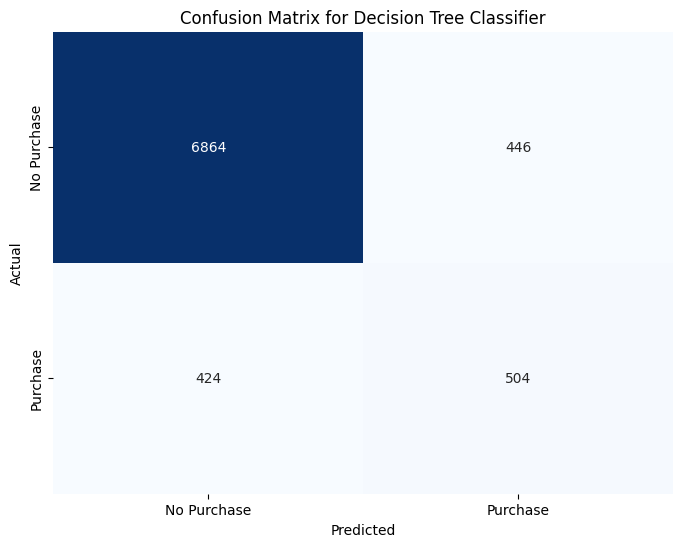

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# 2. Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 3. Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# 4. Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 5. Display the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Purchase', 'Purchase'],
            yticklabels=['No Purchase', 'Purchase'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

## Visualize Feature Importance

### Subtask:
Visualize the feature importances from the trained decision tree model to understand which features contribute most to the prediction. Provide a bar chart for this visualization.


**Reasoning**:
I need to extract feature importances from the trained decision tree classifier, sort them, and then visualize the top features in a bar chart to understand their contribution to the model's predictions.



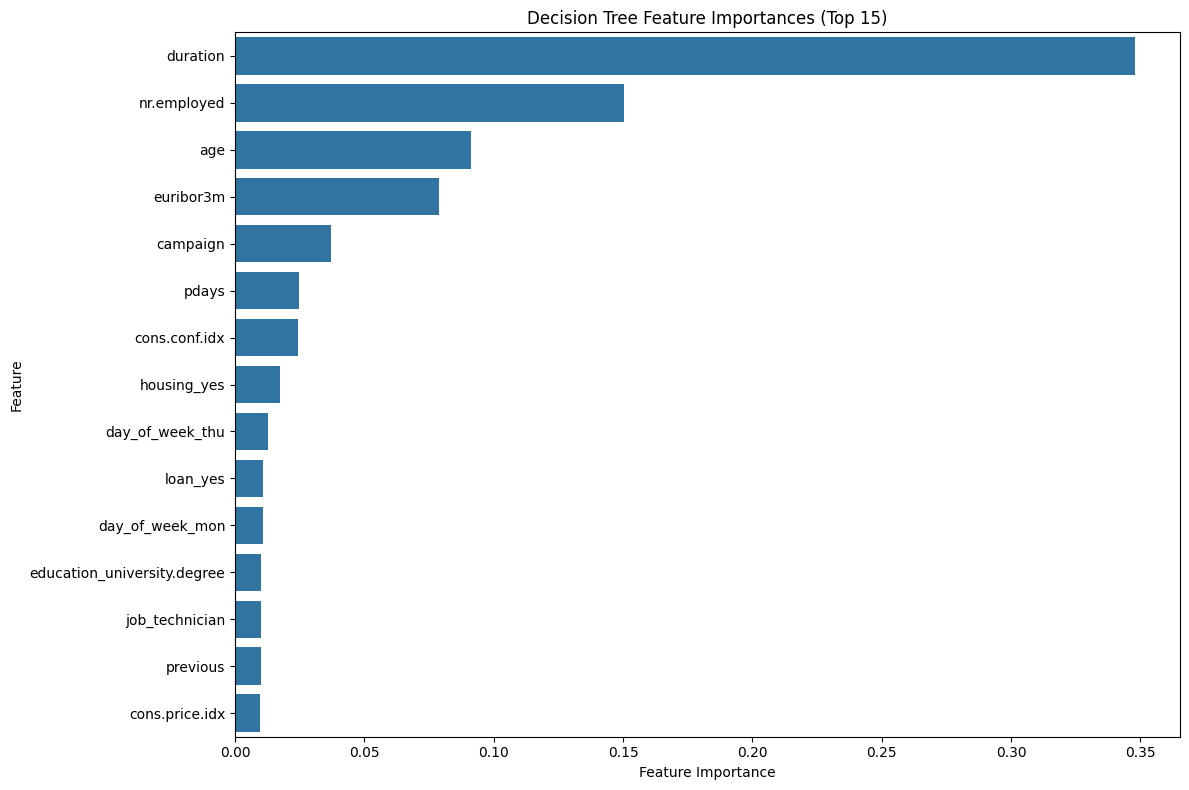

Feature importances visualized successfully.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Extract feature importances
feature_importances = dt_classifier.feature_importances_

# 2. Create a pandas Series for better handling and labeling
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# 3. Sort the feature importances in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

# 4. Create a bar chart of the top N (e.g., top 15) most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df.head(15))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importances (Top 15)')
plt.tight_layout()
plt.show()

print("Feature importances visualized successfully.")

## Final Task

### Subtask:
Summarize the findings from the decision tree model, including its performance and the most important features for predicting customer purchases. Provide insights based on the analysis.


## Summary:

### Q&A
The decision tree model achieved an accuracy of 0.8944. For the positive class (customer purchase), it showed a precision of 0.5305, a recall of 0.5431, and an F1-score of 0.5367. The most important features for predicting customer purchases, as identified by the decision tree, include `duration` (call duration), `euribor3m` (Euribor 3 month rate), `nr.employed` (number of employees), `age`, and `pdays` (days since last contact).

### Data Analysis Key Findings
*   The dataset contains 41,188 entries and 21 columns, with a mix of numerical and categorical features.
*   No explicit missing (NaN) values were found; however, several categorical columns such as 'job', 'marital', 'education', 'default', 'housing', and 'loan' contain an 'unknown' category.
*   The target variable 'y' (customer purchase) is highly imbalanced, with 88.73% of instances being 'no' and only 11.27% being 'yes'.
*   Numerical features like `duration` (mean ~258 seconds) and `pdays` (with a high frequency of 999 indicating no prior contact) show notable distributions.
*   Data preprocessing involved converting the target variable 'y' to numerical (1 for 'yes', 0 for 'no'), applying one-hot encoding to 10 categorical columns (expanding the feature set to 53 columns), and splitting the data into stratified training and testing sets (80/20 ratio).
*   The Decision Tree Classifier model, trained on this preprocessed data, yielded an accuracy of 0.8944 on the test set.
*   The model's ability to identify positive cases (customer purchases) is moderate, as indicated by a precision of 0.5305 and a recall of 0.5431.
*   Feature importance analysis revealed that `duration`, `euribor3m`, `nr.employed`, `age`, and `pdays` are the most influential factors in predicting customer purchases.

### Insights or Next Steps
*   The class imbalance in the target variable significantly impacts the model's performance for the minority class, suggesting that techniques like oversampling (SMOTE), undersampling, or using algorithms robust to imbalance (e.g., LightGBM, XGBoost) could lead to better predictive power for purchases.
*   The high importance of `duration`, `euribor3m`, and `nr.employed` suggests that these economic indicators and interaction length are key drivers for customer purchasing decisions, which could inform campaign strategies. Further investigation into the nature of 'unknown' values in categorical features and the meaning of `pdays=999` is warranted, as these could represent valuable information or require specific handling.
